<a href="https://colab.research.google.com/github/mohit-singh4180/Machine_learning/blob/main/DL_CNN_Demo1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as im

In [ ]:
from tensorflow.keras.datasets import mnist

### loading the dataset

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

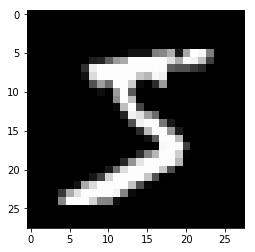

In [ ]:
plt.imshow(xtrain[0],cmap="gray")

In [ ]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
ytrain[0]

5

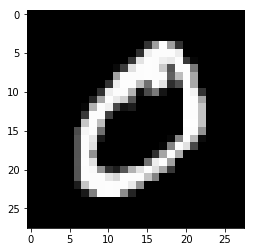

In [ ]:
plt.imshow(xtrain[1],cmap="gray")

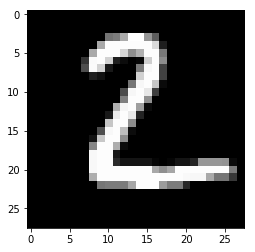

In [ ]:
plt.imshow(xtest[1],cmap="gray")

### one hot encoding

In [ ]:
ohe=pd.get_dummies(ytrain)

In [ ]:
ohe.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [ ]:
ohe_test=pd.get_dummies(ytest)
ohe_test.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


### normalization

In [ ]:
scaled_xtrain=xtrain/255

In [ ]:
scaled_xtest=xtest/255

In [ ]:
scaled_xtrain.shape

(60000, 28, 28)

In [ ]:
scaled_xtest.shape

(10000, 28, 28)

### reshaping: we need to feed the images which have the following shape (no. images,row,col,channel)

In [ ]:
scaled_xtrain=scaled_xtrain.reshape(60000, 28, 28,1)
scaled_xtest=scaled_xtest.reshape(10000, 28, 28,1)

In [ ]:
scaled_xtrain.shape

(60000, 28, 28, 1)

### create our deep learning model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D,Flatten

In [ ]:
model=Sequential()

#CNN layers
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28, 28, 1),activation="relu"))
model.add(MaxPool2D())
model.add(Flatten())

# ANN layers
model.add(Dense(120,activation="relu")) # HL
model.add(Dense(10,activation="softmax")) # O/p layer

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy")

In [ ]:
model.fit(scaled_xtrain,ohe,epochs=10) # batch size need to be added ----> batch_size=1

Epoch 1/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1397
Epoch 2/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0470
Epoch 3/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0307
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0211
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0139: 0s - loss: 
Epoch 6/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0117
Epoch 7/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0092
Epoch 8/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0062
Epoch 9/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0065
Epoch 10/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0049


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               553080    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1210      
Total params: 554,834
Trainable params: 554,834
Non-trainable params: 0
_________________________________________________________________


### evaluating the model

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

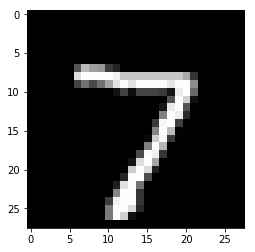

In [ ]:
plt.imshow(xtest[0],cmap="gray")

In [ ]:
ytest[1]

2

In [ ]:
ypred=model.predict(scaled_xtest)
ypred[1]
output=list(ypred[1])
output.index(max(list(ypred[1])))

2

In [ ]:
ypred2=model.predict_classes(scaled_xtest)

In [ ]:
ypred2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
len(ypred2)

10000

In [ ]:
confusion_matrix(ytest,ypred2)

array([[ 973,    0,    2,    1,    0,    1,    2,    0,    1,    0],
       [   0, 1127,    2,    0,    1,    1,    3,    1,    0,    0],
       [   0,    0, 1022,    0,    0,    0,    2,    4,    4,    0],
       [   0,    0,    2,  995,    0,   10,    0,    0,    3,    0],
       [   1,    0,    0,    0,  960,    0,    7,    1,    3,   10],
       [   0,    0,    0,    2,    0,  888,    1,    0,    1,    0],
       [   4,    2,    0,    0,    1,    1,  947,    0,    3,    0],
       [   0,    1,   11,    0,    0,    0,    0, 1012,    1,    3],
       [   2,    0,    2,    0,    0,    1,    0,    1,  967,    1],
       [   0,    0,    1,    3,    1,    5,    0,    3,    8,  988]],
      dtype=int64)

In [ ]:
accuracy_score(ytest,ypred2)

0.9879

### enter out image 

In [ ]:
import cv2

In [ ]:
BGR=cv2.imread(r"C:\Users\etisalat\Desktop\test.png")
g=cv2.cvtColor(BGR,cv2.COLOR_BGR2GRAY)
gtest=g.reshape(1,28,28,1)
gtest=gtest/255
model.predict_classes(gtest)

array([2], dtype=int64)